In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from RaceTrack import RaceTrack
    
# RaceTrack Constructor
L = RaceTrack('L-track.txt')
O = RaceTrack('O-track.txt')
R = RaceTrack('R-track.txt')
W = RaceTrack('W-track.txt')

# Value Iteration

In [2]:
VW, QW, iterations_W = W.value_iteration(0.5)
VL, QL, iterations_L = L.value_iteration(0.5)
VO, QO, iterations_O = O.value_iteration(0.5)
VR, QR, iterations_R = R.value_iteration(0.5)
VR_hard, QR_hard, iterations_R_hard = R.value_iteration(0.5, hardmode=True)

11


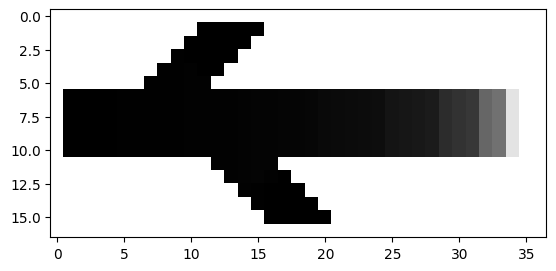

In [3]:
print(iterations_W)
plt.imshow(VW[:, :, 0, 0].T, cmap='gray')

11


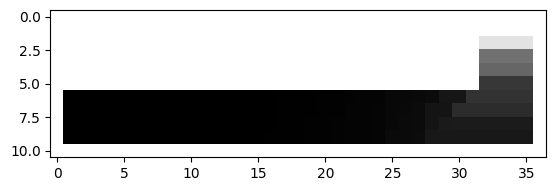

In [4]:
print(iterations_L)
plt.imshow(VL[:, :, 0, 0].T, cmap='gray')

11


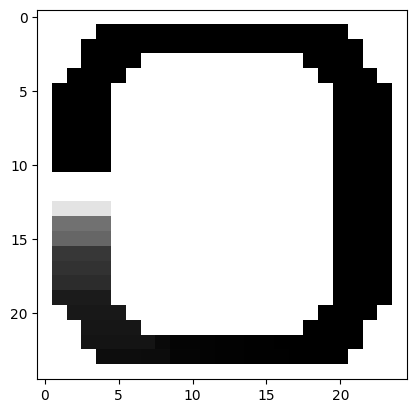

In [5]:
print(iterations_O)
plt.imshow(VO[:, :, 0, 0].T, cmap='gray')

11


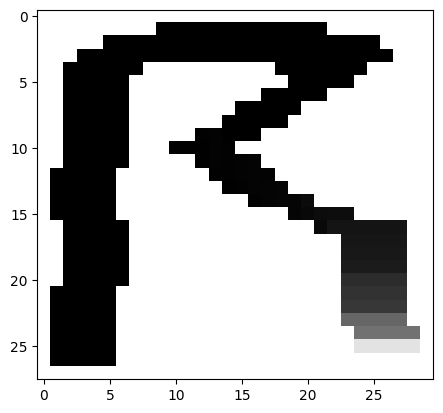

In [6]:
print(iterations_R_hard)
plt.imshow(VR_hard[:, :, 0, 0].T, cmap='gray')

11


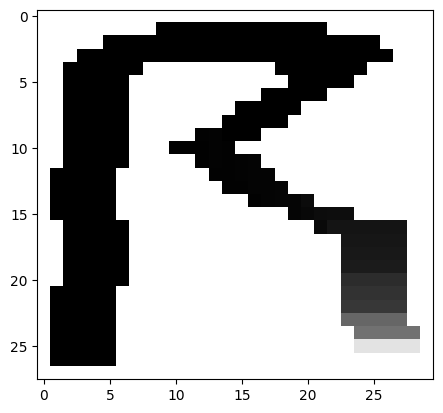

In [7]:
print(iterations_R)
plt.imshow(VR[:, :, 0, 0].T, cmap='gray')

In [8]:
def value_iteration_plots(track, discounts, title):
    n_iterations = []
    for discount in discounts:
        V, Q, iterations = track.value_iteration(discount)
        n_iterations.append(iterations)
    print(n_iterations)
    plt.plot(discounts, n_iterations, '-')
    plt.xlabel('Discount')
    plt.ylabel('Iterations')
    plt.title(title)

[5, 6, 7, 9, 11, 14, 15, 16, 18]


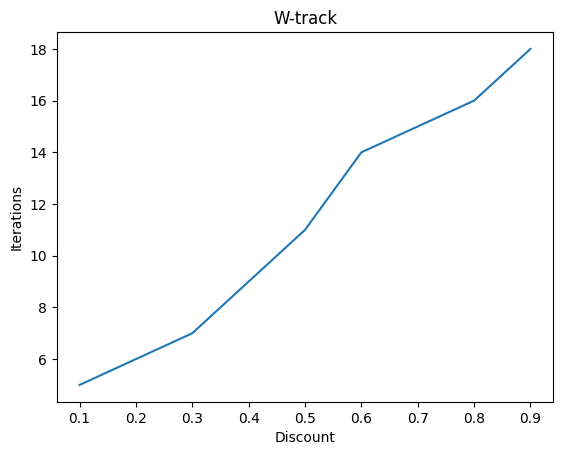

In [9]:
discounts = np.arange(0.1, 1, .1)
value_iteration_plots(W, discounts, 'W-track')

[5, 6, 7, 9, 11, 14, 15, 17, 18]


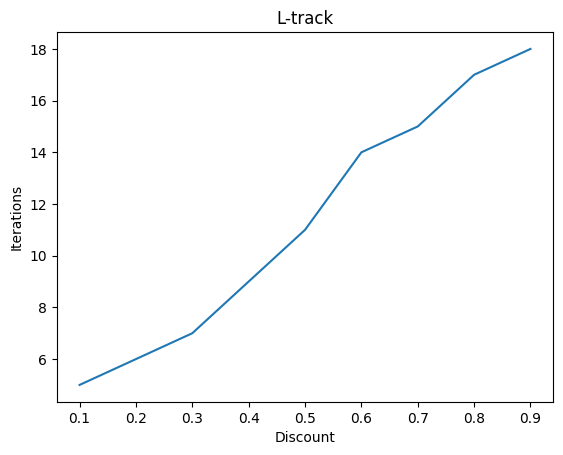

In [10]:
value_iteration_plots(L, discounts, 'L-track')

[5, 6, 7, 9, 11, 15, 21, 28, 30]


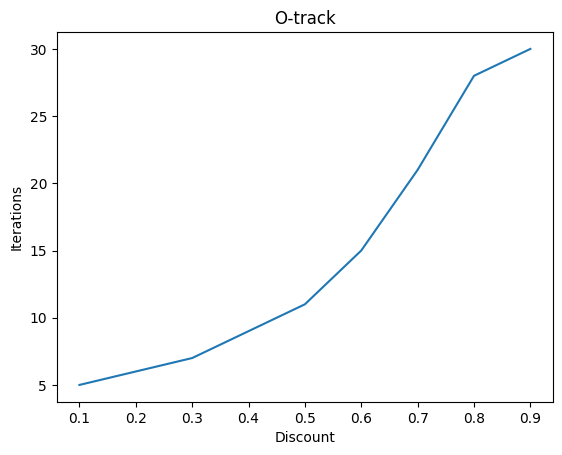

In [11]:
value_iteration_plots(O, discounts, 'O-track')

[5, 6, 7, 9, 11, 15, 21, 29, 31]


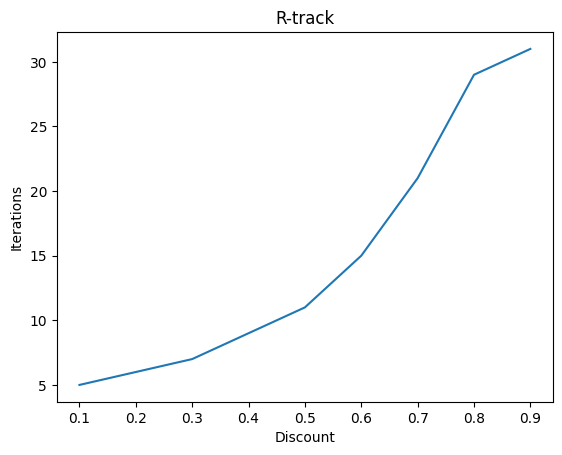

In [12]:
value_iteration_plots(R, discounts, 'R-track')

[5, 6, 7, 9, 11, 15, 21, 32, 47]


Text(0.5, 1.0, 'R-track restart after crash')

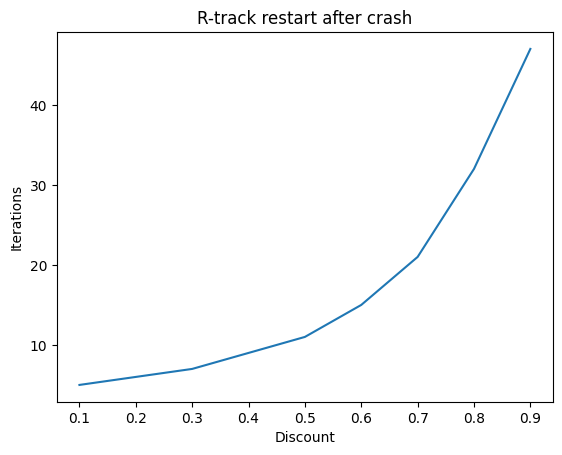

In [13]:
n_iterations = []
for discount in discounts:
    V, Q, iterations = R.value_iteration(discount, hardmode=True)
    n_iterations.append(iterations)
print(n_iterations)
plt.plot(discounts, n_iterations, '-')
plt.xlabel('Discount')
plt.ylabel('Iterations')
plt.title('R-track restart after crash')

# Q learning

[11300, 3900, 2900, 2600, 1800, 1400]


Text(0.5, 1.0, 'W-track')

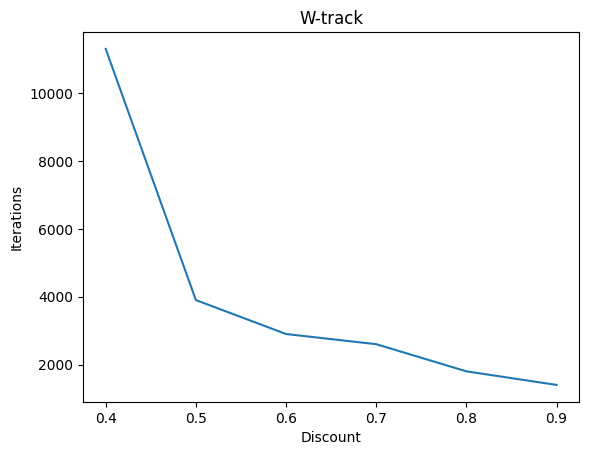

In [14]:
# Effect of discount
discounts = np.arange(0.4, 1, .1)
n_iterations = []
for discount in discounts:
    Q, moves = W.q_learning(discount, .9, decay=0, epsilon = 10000)
    n_iterations.append(len(moves))
print(n_iterations)
plt.plot(discounts, n_iterations, '-')
plt.xlabel('Discount')
plt.ylabel('Iterations')
plt.title('W-track')

[26000, 7400, 2900, 1900, 1300, 700]


Text(0.5, 1.0, 'W-track')

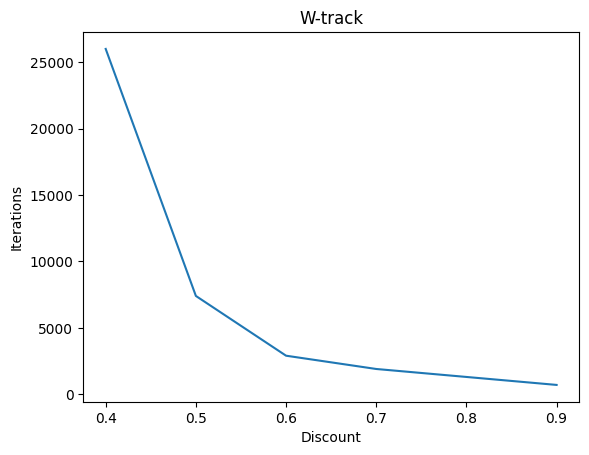

In [15]:
discounts = np.arange(0.4, 1, .1)
n_iterations = []
for discount in discounts:
    Q, moves = W.sarsa(discount, .9, decay=0, epsilon = 10000)
    n_iterations.append(len(moves))
print(n_iterations)
plt.plot(discounts, n_iterations, '-')
plt.xlabel('Discount')
plt.ylabel('Iterations')
plt.title('W-track')

0.0
0.1
0.2
[1500, 900, 1400]


Text(0.5, 1.0, 'W-track')

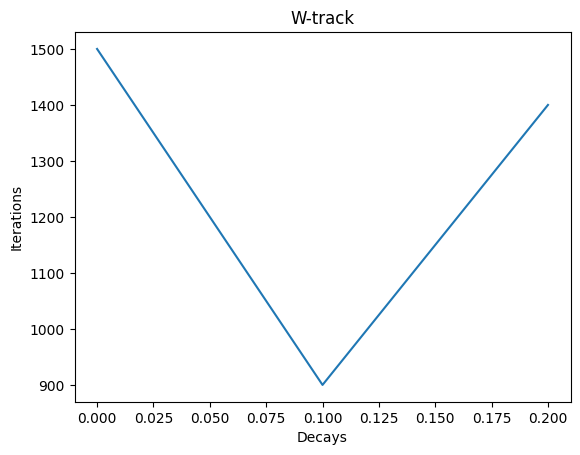

In [29]:
# Effect of eligibility traces
decays = np.arange(0, .3, .1)
n_iterations = []
for decay in decays:
    print(decay)
    Q, moves = W.q_learning(.9, .9, decay, epsilon = 10000)
    n_iterations.append(len(moves))
print(n_iterations)
plt.plot(decays, n_iterations, '-')
plt.xlabel('Decays')
plt.ylabel('Iterations')
plt.title('W-track')

In [26]:
def qlearning_plots(track, title, discount = 0.9, decay=0, sarsa = False):
    if sarsa:
        (Q, moves) = track.sarsa(discount, .9, decay, epsilon = 10)
    else:
        (Q, moves) = track.q_learning(discount, .9, decay, epsilon = 10)
    move_ave = np.average(np.array(moves).reshape(-1, 100), axis=1)
    print(len(moves))
    print(moves[-10:len(moves)])
    plt.plot(np.arange(len(moves)), moves, '.', ms = 1)
    plt.plot(np.arange(len(move_ave))*100, move_ave, 'r-')
    plt.xlabel('Iteration')
    plt.ylabel('Moves')
    plt.legend(['Moves', 'Average (100 iterations)'])
    plt.title(title)

23000
[11, 11, 15, 10, 14, 10, 11, 10, 13, 11]


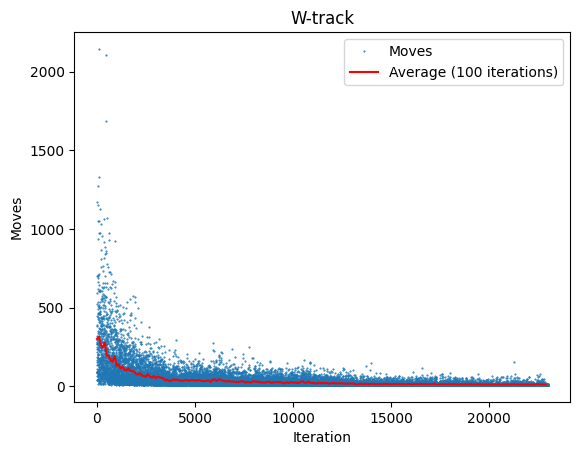

In [18]:
qlearning_plots(W, 'W-track')

17500
[12, 12, 13, 12, 15, 13, 12, 17, 21, 12]


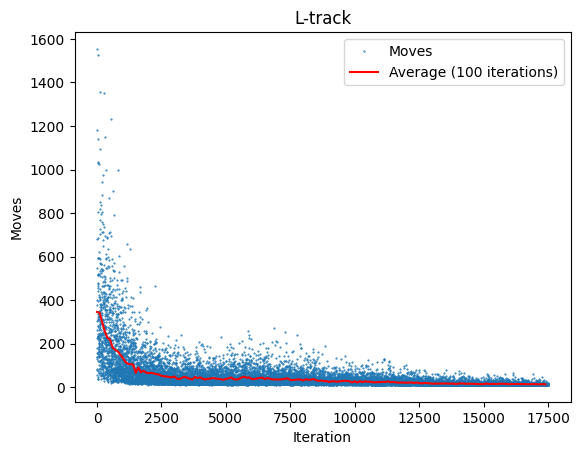

In [19]:
qlearning_plots(L, 'L-track')

30200
[33, 31, 28, 32, 27, 31, 28, 29, 35, 30]


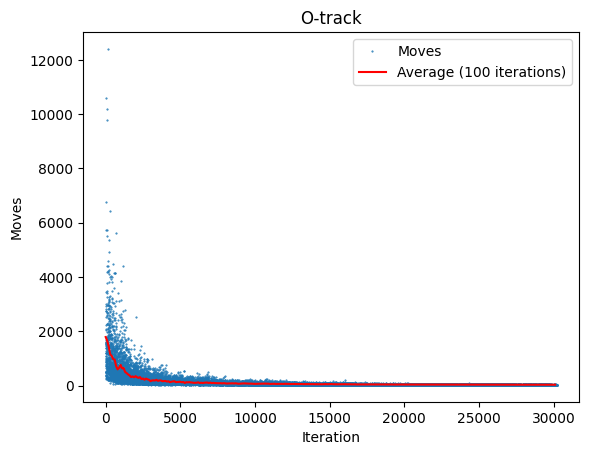

In [20]:
qlearning_plots(O, 'O-track')

40200
[29, 38, 29, 28, 31, 31, 34, 28, 28, 25]


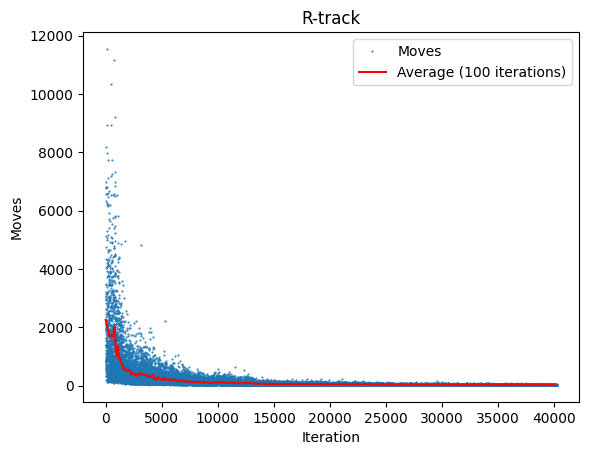

In [21]:
qlearning_plots(R, 'R-track')

800


Text(0.5, 1.0, 'L-track (restart after crash)')

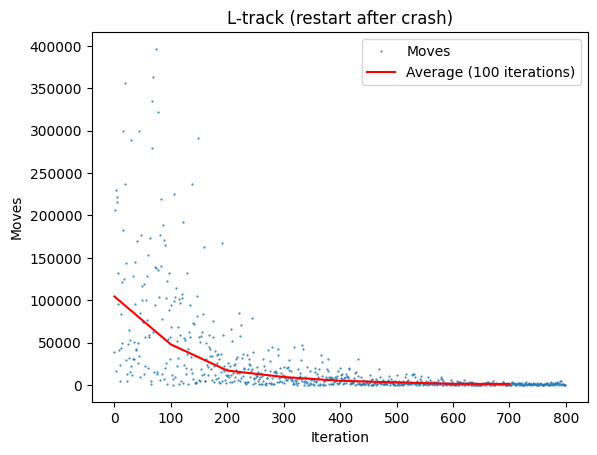

In [28]:
(Q, moves) = L.q_learning(0.9, .8, 0, epsilon = 1E6, hardmode=True)
move_ave = np.average(np.array(moves).reshape(-1, 100), axis=1)
print(len(moves))
plt.plot(np.arange(len(moves)), moves, '.', ms = 1)
plt.plot(np.arange(len(move_ave))*100, move_ave, 'r-')
plt.xlabel('Iteration')
plt.ylabel('Moves')
plt.legend(['Moves', 'Average (100 iterations)'])
plt.title('L-track (restart after crash)')

# SARSA

14800
[9, 9, 9, 9, 11, 9, 15, 9, 11, 12]


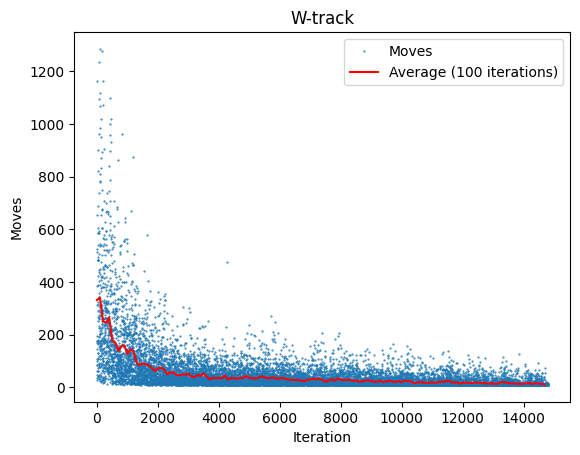

In [22]:
qlearning_plots(W, 'W-track', True)

16700
[12, 13, 11, 11, 12, 13, 13, 13, 13, 12]


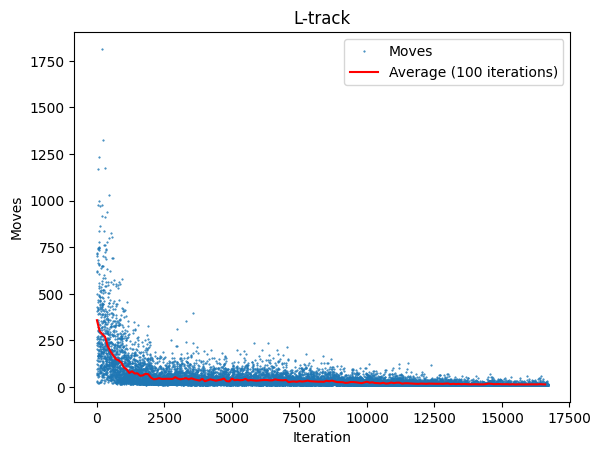

In [23]:
qlearning_plots(L, 'L-track', True)

16300
[30, 28, 31, 26, 33, 28, 31, 33, 27, 29]


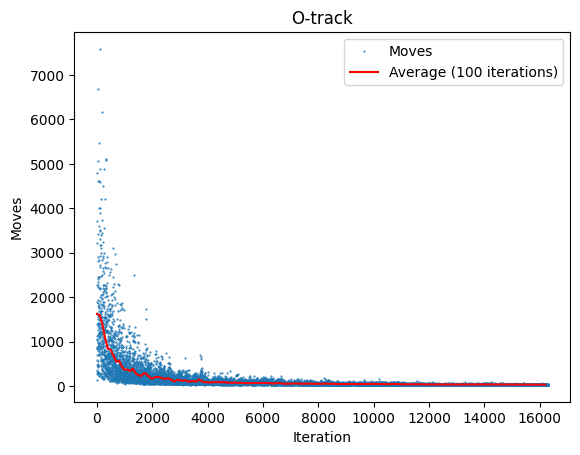

In [24]:
qlearning_plots(O, 'O-track', True)

19800
[36, 29, 27, 28, 28, 29, 34, 33, 30, 28]


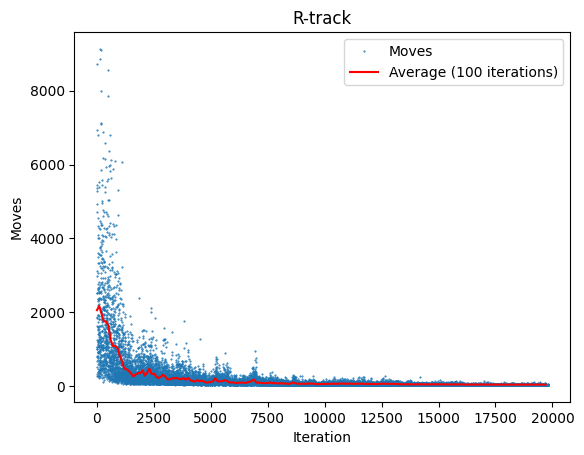

In [25]:
qlearning_plots(R, 'R-track', True)